## Número de Reclamações - Dados Jan/2022
link ->  https://consumidor.gov.br/pages/dadosabertos/externo/

In [1]:
# Importando as bibliotecas
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Biblioteca para trabalhar com mapa
!pip install folium

In [8]:
# Carregando a base de dados
# Ao utilizar enconding='latin1' apareceu erros de acentuação. Para corrigir utilizei enconding = 'utf-8'

df = pd.read_csv('finalizadas_2022-01.csv', sep=';', encoding='utf-8')
df.head().T

,0,1,2,3,4
Região,S,NE,S,NE,SE
UF,SC,MA,RS,BA,RJ
Cidade,Florianópolis,Timon,Santa Maria,Teixeira de Freitas,Rio de Janeiro
Sexo,M,M,M,M,M
Faixa Etária,entre 51 a 60 anos,mais de 70 anos,entre 21 a 30 anos,entre 21 a 30 anos,entre 41 a 50 anos
Data Finalização,2022-01-19,2022-01-01,2022-01-01,2022-01-01,2022-01-04
Tempo Resposta,NaN,NaN,10,NaN,NaN
Nome Fantasia,Banco BV (antigo Banco Votorantim),Oi Fixo,Vivo - Telefônica,Uber,Central Nacional Unimed
Segmento de Mercado,"Bancos, Financeiras e Administradoras de Cartão","Operadoras de Telecomunicações (Telefonia, Int...","Operadoras de Telecomunicações (Telefonia, Int...",Empresas de Intermediação de Serviços / Negócios,Operadoras de Planos de Saúde e Administradora...
Área,Serviços Financeiros,Telecomunicações,Telecomunicações,Demais Serviços,Saúde


In [56]:
df.describe()

,Tempo Resposta,Nota do Consumidor
count,120771.000000,64111.000000
mean,7.453470,2.753662
std,2.967324,1.771191
min,0.000000,1.000000
25%,5.000000,1.000000
50%,8.000000,2.000000
75%,10.000000,5.000000
max,12.000000,5.000000


In [57]:
df.dtypes

Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Data Finalização           object
Tempo Resposta            float64
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empresa           object
Respondida                 object
Situação                   object
Avaliação Reclamação       object
Nota do Consumidor        float64
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123707 entries, 0 to 123706
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Região                  123707 non-null  object 
 1   UF                      123707 non-null  object 
 2   Cidade                  123707 non-null  object 
 3   Sexo                    123700 non-null  object 
 4   Faixa Etária            123707 non-null  object 
 5   Data Finalização        123707 non-null  object 
 6   Tempo Resposta          120771 non-null  float64
 7   Nome Fantasia           123707 non-null  object 
 8   Segmento de Mercado     123707 non-null  object 
 9   Área                    123707 non-null  object 
 10  Assunto                 123707 non-null  object 
 11  Grupo Problema          123707 non-null  object 
 12  Problema                123707 non-null  object 
 13  Como Comprou Contratou  123707 non-null  object 
 14  Procurou Empresa    

In [62]:
df.columns

Index(['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Data Finalização',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor'],
      dtype='object')

In [61]:
df.shape

(123707, 19)

In [10]:
# Agrupando as reclamações por estado
df.groupby('UF')['UF'].count()

UF
AC      325
AL      842
AM     1226
AP      197
BA     6987
CE     3359
DF     6283
ES     2991
GO     4264
MA     2611
MG    13620
MS     1149
MT     2149
PA     1622
PB     1394
PE     3518
PI     1536
PR    10199
RJ    12340
RN     1107
RO      523
RR      195
RS     6489
SC     5180
SE      730
SP    32141
TO      730
Name: UF, dtype: int64

## * Reclamações por Sexo

In [14]:
# Reclamações por Sexo

df['Sexo'].value_counts()

M    71024
F    52597
O       79
Name: Sexo, dtype: int64

In [23]:
df1 = df[df['Sexo']!='O']
df1['Sexo'].value_counts()

M    71024
F    52597
Name: Sexo, dtype: int64

In [24]:
df1.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
0,S,SC,Florianópolis,M,entre 51 a 60 anos,2022-01-19,NaN,Banco BV (antigo Banco Votorantim),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Financiamentos de Veículos / Leasing,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,N,Finalizada avaliada,Não Resolvida,1.0
1,NE,MA,Timon,M,mais de 70 anos,2022-01-01,NaN,Oi Fixo,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,N,Finalizada não avaliada,Não Avaliada,NaN
2,S,RS,Santa Maria,M,entre 21 a 30 anos,2022-01-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
3,NE,BA,Teixeira de Freitas,M,entre 21 a 30 anos,2022-01-01,NaN,Uber,Empresas de Intermediação de Serviços / Negócios,Demais Serviços,Aplicativo de mobilidade urbana,Contrato / Oferta,Dificuldade para contratar o serviço (problema...,Não comprei / contratei,S,N,Finalizada não avaliada,Não Avaliada,NaN
4,SE,RJ,Rio de Janeiro,M,entre 41 a 50 anos,2022-01-04,NaN,Central Nacional Unimed,Operadoras de Planos de Saúde e Administradora...,Saúde,"Plano de Saúde (convênio, autogestão, seguro s...",Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Domicílio,S,N,Finalizada não avaliada,Não Avaliada,NaN


In [25]:
df1.tail()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
123702,SE,SP,São Paulo,F,entre 51 a 60 anos,2022-01-31,1.0,Banco Original,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Informação,Informações incompletas / inadequadas sobre o ...,Internet,S,S,Finalizada avaliada,Resolvida,5.0
123703,SE,SP,São Paulo,F,entre 51 a 60 anos,2022-01-31,1.0,Banco Original,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Atendimento Bancário,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,S,Finalizada avaliada,Resolvida,5.0
123704,SE,SP,São Paulo,M,entre 51 a 60 anos,2022-01-31,1.0,Banco Original,"Bancos, Financeiras e Administradoras de Cartão",Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Atendimento / SAC,Má qualidade no atendimento (descortesia / des...,Internet,S,S,Finalizada avaliada,Resolvida,5.0
123705,SE,SP,São Paulo,M,entre 51 a 60 anos,2022-01-31,1.0,Banco Original,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Investimentos / Aplicações / Câmbio / Previdên...,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,S,Finalizada avaliada,Resolvida,5.0
123706,SE,SP,Lençóis Paulista,M,entre 31 a 40 anos,2022-01-31,1.0,Rappi,Empresas de Intermediação de Serviços / Negócios,Demais Serviços,Serviços de entrega / delivery,Entrega do Produto,Não entrega / demora na entrega do produto,Catálogo,S,S,Finalizada avaliada,Não Resolvida,1.0


## * Faixa etária de consumidores por sexo

In [21]:
df.groupby('Sexo')['Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos    15930
      entre 21 a 30 anos    12234
      entre 41 a 50 anos     9389
      entre 51 a 60 anos     6596
      entre 61 a 70 anos     5440
      mais de 70 anos        2204
      até 20 anos             804
M     entre 31 a 40 anos    25906
      entre 21 a 30 anos    17475
      entre 41 a 50 anos    13250
      entre 51 a 60 anos     6589
      entre 61 a 70 anos     4522
      mais de 70 anos        2039
      até 20 anos            1243
O     entre 21 a 30 anos       31
      entre 31 a 40 anos       26
      entre 41 a 50 anos        9
      entre 61 a 70 anos        5
      até 20 anos               3
      mais de 70 anos           3
      entre 51 a 60 anos        2
Name: Faixa Etária, dtype: int64

## * Compras efetuadas por jovens pela Internet

<AxesSubplot:ylabel='Faixa Etária,Como Comprou Contratou'>

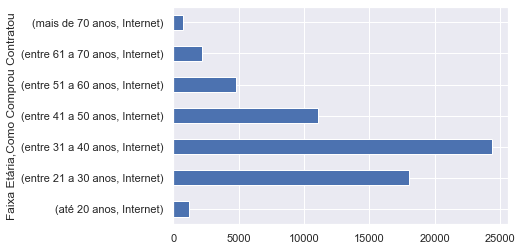

In [30]:
df2 = df[df['Como Comprou Contratou']=='Internet']
df2.groupby('Faixa Etária')['Como Comprou Contratou'].value_counts().plot.barh()

## * Consumidores na faixa dos 21 a 30 anos procuram a empresa antes de comprar?


<AxesSubplot:>

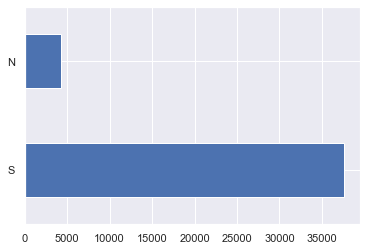

In [32]:
df2 = df[df['Faixa Etária']=='entre 31 a 40 anos']
df2['Procurou Empresa'].value_counts().plot.barh()

## * Qual o grupo mais problemático?

In [34]:
df['Grupo Problema'].value_counts()

Cobrança / Contestação          47115
Contrato / Oferta               24537
Atendimento / SAC               19918
Vício de Qualidade              17484
Entrega do Produto               6935
Dados Pessoais e Privacidade     5426
Informação                       1620
Saúde e Segurança                 672
Name: Grupo Problema, dtype: int64

## * Cobrança / Contestação. Quais problemas estão relacionados a esse grupo?

In [36]:
df[df['Grupo Problema'] == 'Cobrança / Contestação']['Problema'].value_counts()

Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores                      11187
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                             7951
Cobrança indevida / abusiva para alterar ou cancelar o contrato                                            7943
Cobrança de tarifas, taxas, valores não previstos / não informados                                         3886
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                       2160
Cobrança após cancelamento do serviço                                                                      1878
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                          1673
Renegociação / parcelamento de dívida                                                                      1493
Cálculo de juros, saldo devedor (contestação, solicitação de histórico, dúvidas)                        

## * Reclamação por segmento de mercado

In [37]:
df['Segmento de Mercado'].value_counts()

Bancos, Financeiras e Administradoras de Cartão                            29467
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    23048
Transporte Aéreo                                                           15209
Comércio Eletrônico                                                        12358
Empresas de Pagamento Eletrônico                                            5424
Viagens, Turismo e Hospedagem                                               4756
Seguros, Capitalização e Previdência                                        3988
Empresas de Intermediação de Serviços / Negócios                            3940
Energia Elétrica                                                            3577
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       3069
Provedores de Conteúdo e Outros Serviços na Internet                        2821
Programas de Fidelidade                                                     2248
Bancos de Dados e Cadastros 

## * Plotar um gráfico relacionado por segmento de mercado

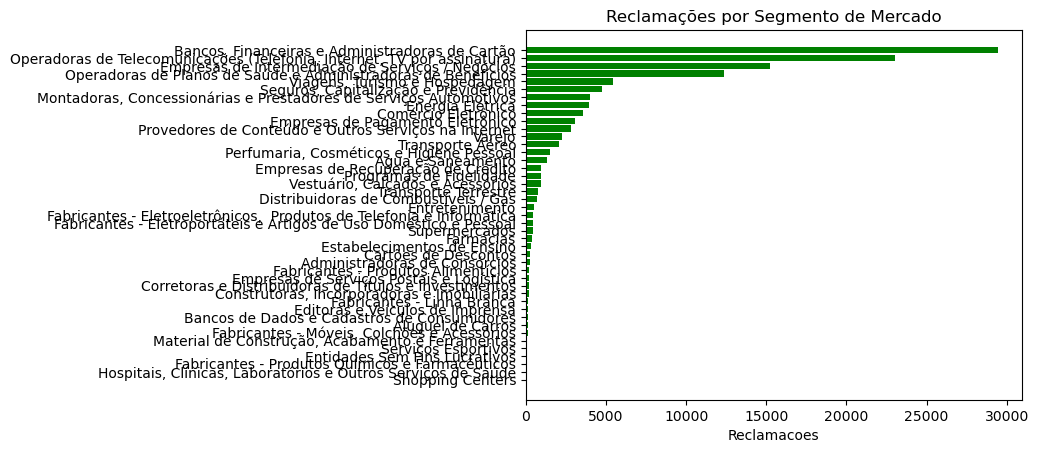

In [39]:
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(df['Segmento de Mercado'].value_counts()))
values = df['Segmento de Mercado'].value_counts()
segmentos = df['Segmento de Mercado'].unique()

ax.barh(y_pos, values, align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Reclamações por Segmento de Mercado')

plt.show()

## * As vinte mais reclamadas

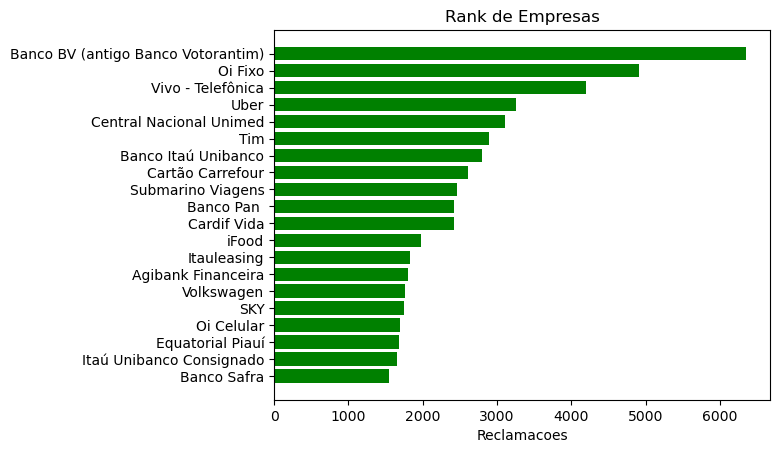

In [41]:
fig, ax = plt.subplots()

y_pos = np.arange(len(df['Nome Fantasia'].value_counts()[:20]))
values = df['Nome Fantasia'].value_counts()[:20]
segmentos = df['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')

plt.show()

## * Avaliando as notas dos consumidores

<AxesSubplot:ylabel='Density'>

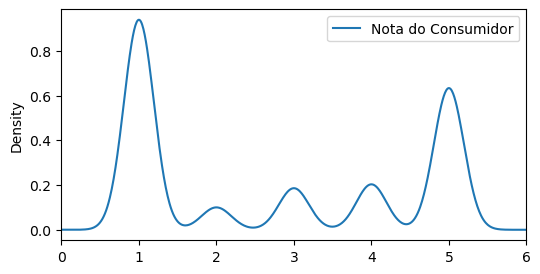

In [47]:
df.plot.density(y='Nota do Consumidor', xlim=[0,6], figsize=[6,3])

## * Quantos dias a empresa leva para responder uma reclamação.

<AxesSubplot:ylabel='Density'>

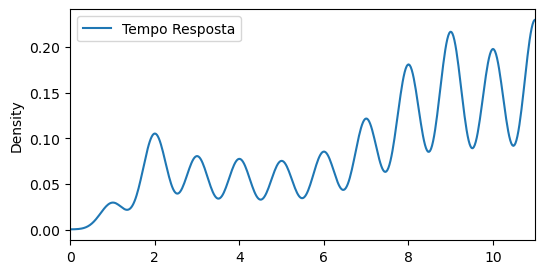

In [52]:
df.plot.density(y='Tempo Resposta', xlim=[0,11], figsize=[6,3])